### Loading Packages

In [1]:
import numpy as np
import pandas as pd

from sympy import *
from scipy import constants, special
from matplotlib import pyplot as plt
from SettingPLOTs import *

c = constants.c
π = constants.pi

### Tweak Figures

### Silica Sellmeier equation

References:

- https://refractiveindex.info/?shelf=main&book=SiO2&page=Malitson
- https://en.wikipedia.org/wiki/Sellmeier_equation

The usual form of the equation for glasses is:

$$n^2=1+\frac{B_1λ^2}{λ^2-C_1^2}+\frac{B_2λ^2}{λ^2-C_2^2}+\frac{B_3λ^2}{λ^2-C_3^2}$$

where $n$ is the refractive index, $\lambda$ is the wavelength, and $B_1, B_2, B_3$ and $C_1, C_2, C_3$ are experimentally determined Sellmeier coefficients.

In [2]:
B1, B2, B3 = 0.6961663, 0.4079426, 0.8974794
C1, C2, C3 = 0.0684043, 0.1162414, 9.896161 # in μm

x, r = symbols('x r')

n = sqrt(1+(B1*x**2)/(x**2-C1**2)+(B2*x**2)/(x**2-C2**2)+(B3*x**2)/(x**2-C3**2))
ng = n - x*diff(n, x)

In [3]:
fname='/home/marvyn/GDrive/m144595@dac.unicamp.br/LPD Team/Papers/Conferences/SBFoton 2019/Tailoring the group-velocity dispersion in silica microspheres through alumina coating/mode_dispersion_with_al2o3.csv'
df2=pd.read_csv(fname,skiprows=8)

fname='/home/marvyn/GDrive/m144595@dac.unicamp.br/LPD Team/Papers/Conferences/SBFoton 2019/Tailoring the group-velocity dispersion in silica microspheres through alumina coating/mode_dispersion_with_sio2.csv'
df1=pd.read_csv(fname,skiprows=8)

r=df1.iloc[:,0].values

y1=df1.iloc[:,1]
y1=y1/np.max(y1)

y2=df1.iloc[:,-2]
y2=y2/np.max(y2)

In [4]:
# plt.figure(figsize=cm2inch(6,2.5))
# plt.plot(x, y1, 'r', lw=2, label=r'$ω_1, l_1, R_1$')
# plt.plot(x, y2, 'b', lw=2, label=r'$ω_2, l_2, R_2$')
# plt.axvline(x=x[y1.idxmax()], ls='--', color='r', lw=1.5, alpha=0.8)
# plt.axvline(x=x[y2.idxmax()], ls='--', color='b', lw=1.5, alpha=0.8)

# plt.axvspan(130, 131, alpha=0.2)
# # plt.yticks([0,0.5,1])
# plt.xlabel(r'$r$ (μm)')
# # plt.legend(loc='best', frameon=False)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim(123, 131)
# plt.grid(True)

# # plt.savefig(path_fig+'intensity-perfil.svg')
# plt.show()

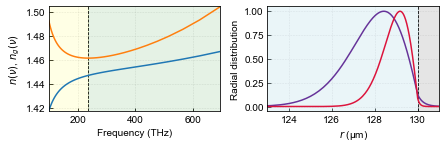

In [36]:
dλ = 5e-2
λ = np.arange(0.43, 3.1, dλ) # in μm
ν = (1e-6*c/λ) # in THz
n = lambdify(x, n, 'numpy')(λ)
ng = lambdify(x, ng, 'numpy')(λ)

fig, axs = plt.subplots(1,2,figsize=cm2inch(16,5.5))

axs[0].plot(ν, n)
axs[0].plot(ν, ng)
axs[0].vlines(x=ν[np.where(ng==np.min(ng))[0][0]], ymin=np.min(n), ymax=np.max(ng), color='k', ls='--', lw=0.8)
axs[0].axvspan(np.min(ν), ν[np.where(ng==np.min(ng))[0][0]], color='yellow', alpha=0.1, lw=0.8)
axs[0].axvspan(ν[np.where(ng==np.min(ng))[0][0]], np.max(ν), color='green', alpha=0.1, lw=0.8)
axs[0].set_xlabel('Frequency (THz)')
axs[0].set_ylabel(r'$n (ν)$, $n_g (ν)$')

axs[1].plot(r, y1, c='#663399')
axs[1].plot(r, y2, c='#DC143C')
axs[1].vlines(x=130, ymin=-0.05, ymax=1.05, color='k', ls='--', lw=0.8)
axs[1].axvspan(np.min(r), 130, color='lightblue', alpha=0.25, lw=0.8)
axs[1].axvspan(130, np.max(r), color='grey', alpha=0.2, lw=0.8)
axs[1].set_xlim(123, 131)
axs[1].set_ylim(-0.05, 1.05)
axs[1].set_xlabel(r'$r$ (μm)')
axs[1].set_ylabel('Radial distribution')

plt.tight_layout()
# plt.savefig('Figures/FSR-frequency-dependence.svg')
plt.show()